In [18]:
import numpy as np
import time
import os
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

# պատահական մեծության ընտրություն
random.seed(53)
np.random.seed(53)
os.environ['PYTHONHASHSEED'] = '53'

# Տվյալների բեռնում
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#  պատկերները դառնում են 784-չափանի վեկտորներ
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# միջինը դարձնենք 0, ստանդարտ շեղումը 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
clf = RandomForestClassifier(n_estimators=11, random_state=53)


start_time = time.time()
clf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# ըքյուրիսի չափում
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Արդյունքների տպում
print(f"Ուսուցման ժամանակը Random Forest-ով: {training_time:.2f} վայրկյան")
print(f"Ճշտությունը Random Forest-ով : {accuracy:.4f}")

Ուսուցման ժամանակը Random Forest-ով: 10.69 վայրկյան
Ճշտությունը Random Forest-ով : 0.8569


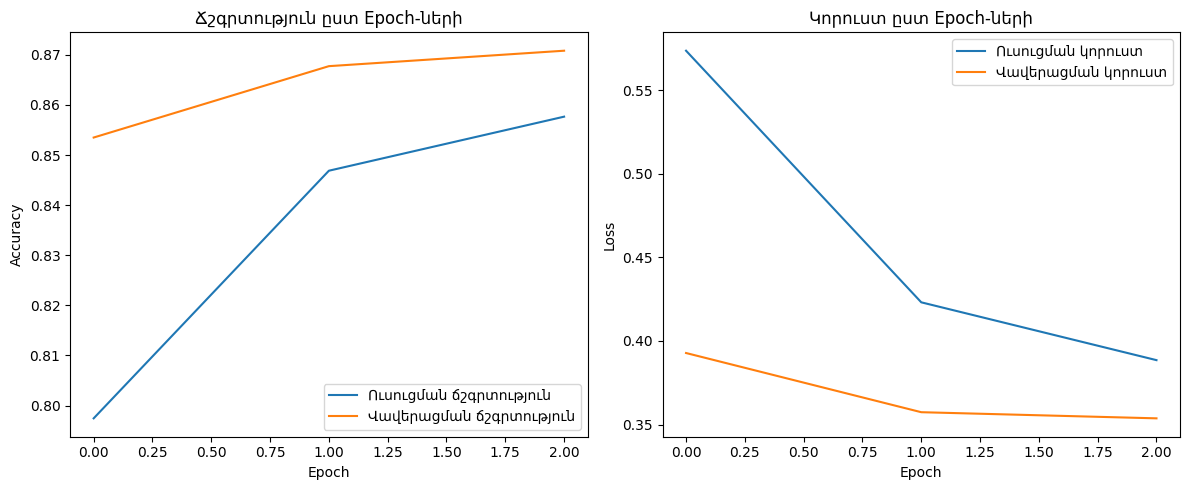

In [19]:
# վիզուալիզացիայի կոդը
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Ուսուցման ճշգրտություն')
plt.plot(history.history['val_accuracy'], label='Վավերացման ճշգրտություն')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Ճշգրտություն ըստ Epoch-ների")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Ուսուցման կորուստ')
plt.plot(history.history['val_loss'], label='Վավերացման կորուստ')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Կորուստ ըստ Epoch-ների")
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import time
import os
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Վերարտադրելիություն
random.seed(53)
np.random.seed(53)
os.environ['PYTHONHASHSEED'] = '53'

# Տվյալների բեռնում
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Տափակեցում
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Հիմնական պարամետրեր
EPOCHS = 3
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2

# երեք լեյեռանի նեյրոնային ցանց
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# օպտիմայձերի ընտրություն
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# նեյրոնային ցանցի ուսուցում
start_time = time.time()
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)
training_time = time.time() - start_time


# Թեստի արդյունքներ
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

print(f"\n Ուսուցման ժամանակը: {training_time:.2f} վայրկյան")
print(f" Թեստի ճշգրտությունը: {accuracy:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7396 - loss: 0.7474 - val_accuracy: 0.8535 - val_loss: 0.3928
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8426 - loss: 0.4361 - val_accuracy: 0.8677 - val_loss: 0.3574
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8581 - loss: 0.3861 - val_accuracy: 0.8708 - val_loss: 0.3537

 Ուսուցման ժամանակը: 10.59 վայրկյան
 Թեստի ճշգրտությունը: 0.8601


In [11]:
import numpy as np
import time
import os
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

# Վերարտադրելիություն
random.seed(53)
np.random.seed(53)
os.environ['PYTHONHASHSEED'] = '53'

# Տվյալների բեռնում
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Տափակեցում՝ պատկերները դառնում են 784-չափանի վեկտորներ
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Նորմալացում՝ միջինը 0, ստանդարտ շեղումը 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest դասակարգիչ
clf = RandomForestClassifier(n_estimators=10, random_state=53)

# Ուսուցման ժամանակի չափում
start_time = time.time()
clf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Կանխատեսում և ճշգրտության հաշվարկ
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Արդյունքների տպում
print(f"Ուսուցման ժամանակը Random Forest-ով : {training_time:.2f} վայրկյան")
print(f"Ճշտությունը Random Forest-ով : {accuracy:.4f}")


Ուսուցման ժամանակը Random Forest-ով : 9.70 վայրկյան
Ճշտությունը Random Forest-ով : 0.8561
